In [1]:
# Data manipulation and analysis
import pandas as pd  
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)


In [2]:
# Load the dataset
df = pd.read_csv('heart_disease (1).csv')  # Ensure 'heart.csv' is in your working directory

# Display the first 5 rows
df.head()


,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
# Get dataset shape
print(f'Dataset shape: {df.shape}')

# Get data types and non-null counts
df.info()


Dataset shape: (303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    float64
 1   gender           303 non-null    float64
 2   cp               303 non-null    float64
 3   trestbps         303 non-null    float64
 4   chol             303 non-null    float64
 5   fbs              303 non-null    float64
 6   restecg          303 non-null    float64
 7   thalach          303 non-null    float64
 8   exang            303 non-null    float64
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    float64
 11  ca               299 non-null    float64
 12  thal             301 non-null    float64
 13  heart_diagnosis  303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [4]:
# Get statistical summary
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
gender,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
# Check for missing values
df.isnull().sum()


age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 4
thal               2
heart_diagnosis    0
dtype: int64

In [6]:
# Remove rows with any null values
df.dropna(inplace=True)


In [7]:
# Get dataset shape
print(f'Dataset shape: {df.shape}')

# Get data types and non-null counts
df.info()

Dataset shape: (297, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              297 non-null    float64
 1   gender           297 non-null    float64
 2   cp               297 non-null    float64
 3   trestbps         297 non-null    float64
 4   chol             297 non-null    float64
 5   fbs              297 non-null    float64
 6   restecg          297 non-null    float64
 7   thalach          297 non-null    float64
 8   exang            297 non-null    float64
 9   oldpeak          297 non-null    float64
 10  slope            297 non-null    float64
 11  ca               297 non-null    float64
 12  thal             297 non-null    float64
 13  heart_diagnosis  297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


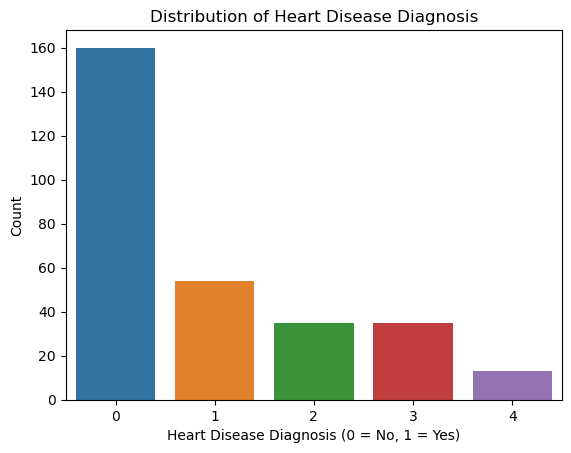

In [8]:
# Plot the distribution of the target variable
sns.countplot(x='heart_diagnosis', data=df)
plt.title('Distribution of Heart Disease Diagnosis')
plt.xlabel('Heart Disease Diagnosis (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


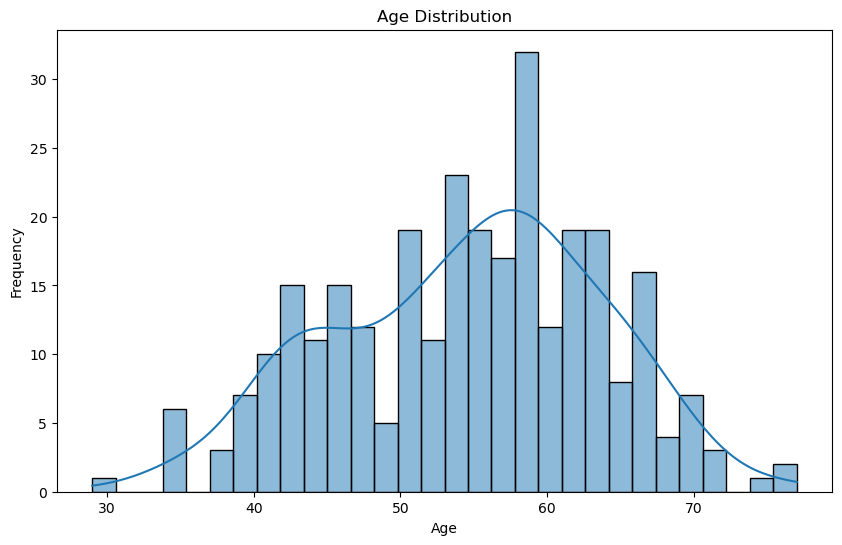

In [9]:
# Histogram of age
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


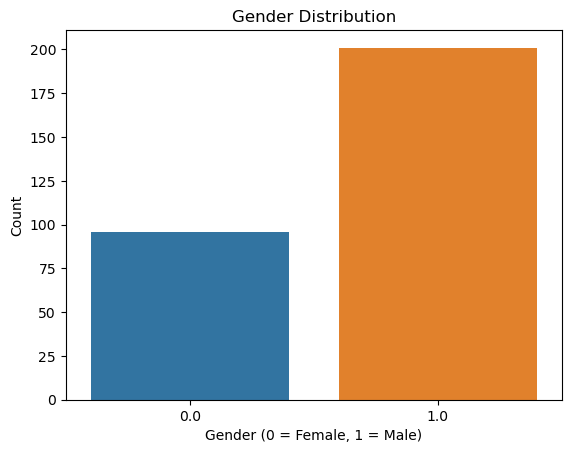

In [10]:
# Countplot for gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()


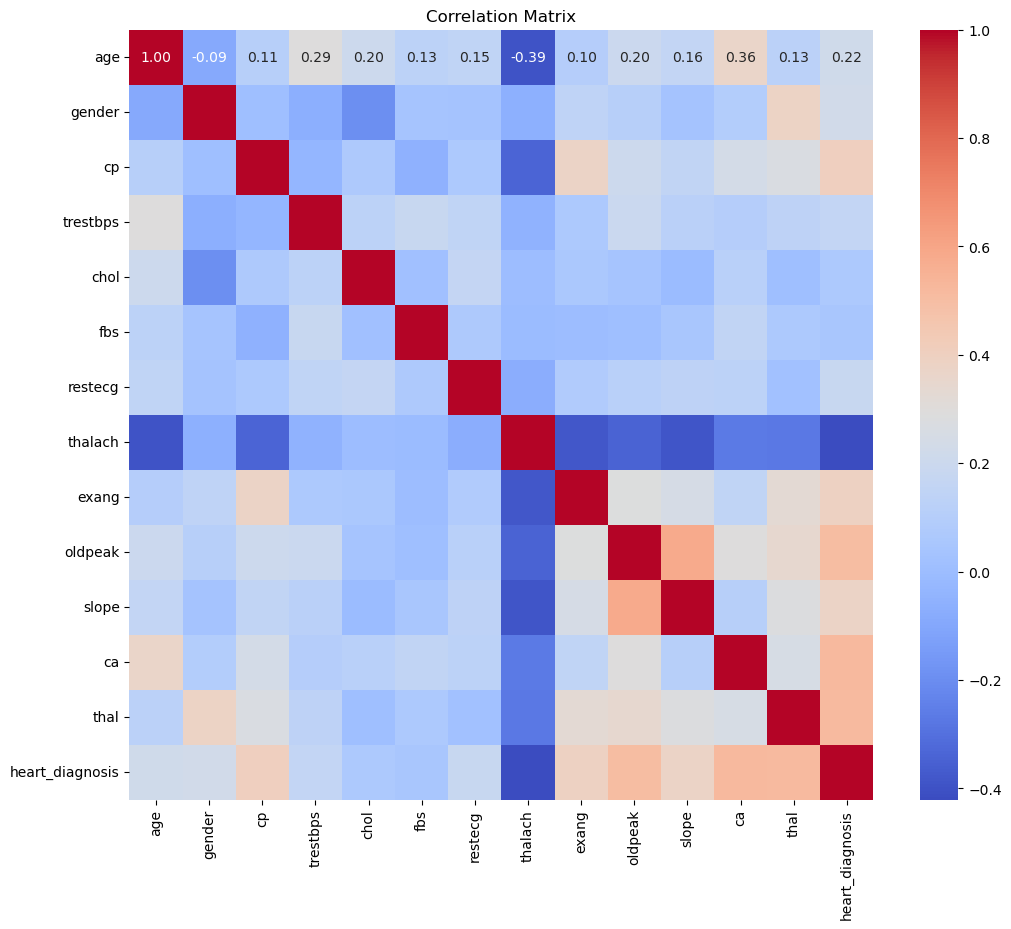

In [11]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

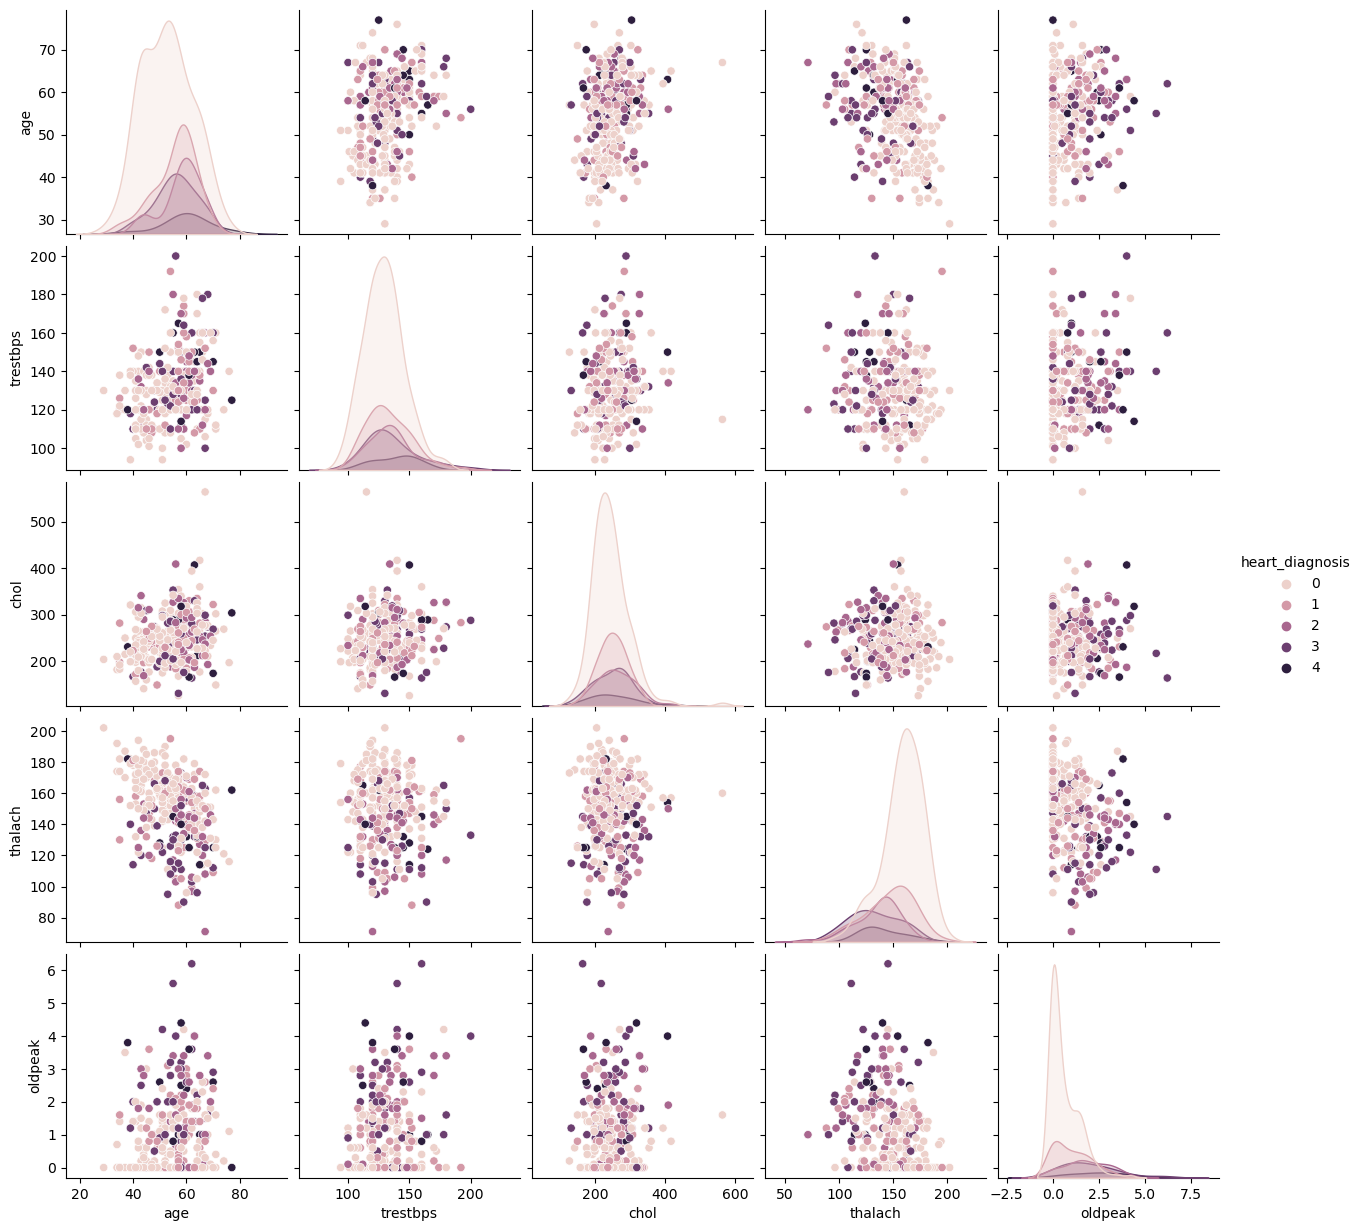

In [12]:
# Pairplot of selected features
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'heart_diagnosis']], hue='heart_diagnosis')
plt.show()


In [13]:
# Define categorical columns
categorical_cols = ['gender', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [14]:
# Define numerical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


In [15]:
# Define features and target variable
X = df_encoded.drop('heart_diagnosis', axis=1)
y = df_encoded['heart_diagnosis']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check the shape of the splits
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train distribution:\n{y_train.value_counts()}')
print(f'y_test distribution:\n{y_test.value_counts()}')


X_train shape: (237, 20)
X_test shape: (60, 20)
y_train distribution:
heart_diagnosis
0    128
1     43
3     28
2     28
4     10
Name: count, dtype: int64
y_test distribution:
heart_diagnosis
0    32
1    11
3     7
2     7
4     3
Name: count, dtype: int64


In [16]:
# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [17]:
# Make predictions
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:,1]


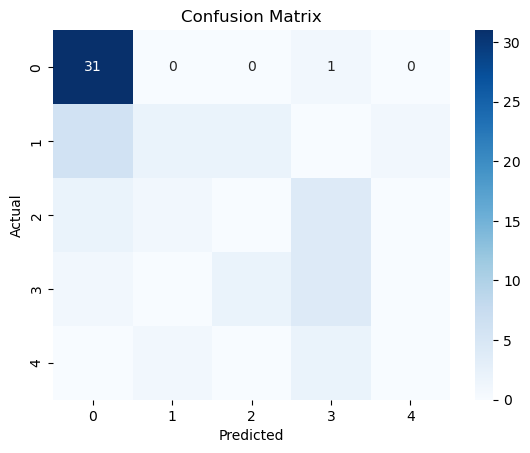

In [18]:
# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [19]:
# Generate classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.86        32
           1       0.50      0.18      0.27        11
           2       0.00      0.00      0.00         7
           3       0.36      0.57      0.44         7
           4       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.33      0.34      0.31        60
weighted avg       0.55      0.62      0.56        60



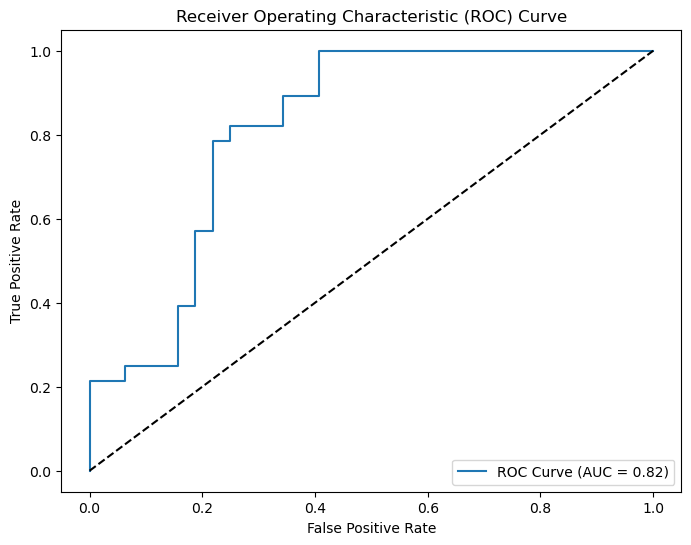

In [21]:
# Example: Convert to binary classification
y_test_binary = (y_test > 0).astype(int)
y_prob_binary = logreg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_binary)
auc_score = roc_auc_score(y_test_binary, y_prob_binary)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [22]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.2f}')


Accuracy Score: 0.62


In [23]:
# Get feature names
feature_names = X.columns

# Get coefficients
coefficients = logreg.coef_[0]

# Create a dataframe for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Calculate absolute values and sort
feature_importance['Importance'] = feature_importance['Coefficient'].apply(abs)
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance.head(10)


,Feature,Coefficient,Importance
16,ca_2.0,-1.490444,1.490444
8,cp_4.0,-1.282901,1.282901
15,ca_1.0,-1.159105,1.159105
5,gender_1.0,-1.017327,1.017327
17,ca_3.0,-0.989670,0.989670
19,thal_7.0,-0.921282,0.921282
4,oldpeak,-0.689558,0.689558
13,slope_2.0,-0.654855,0.654855
6,cp_2.0,-0.469391,0.469391
11,restecg_2.0,-0.450650,0.450650


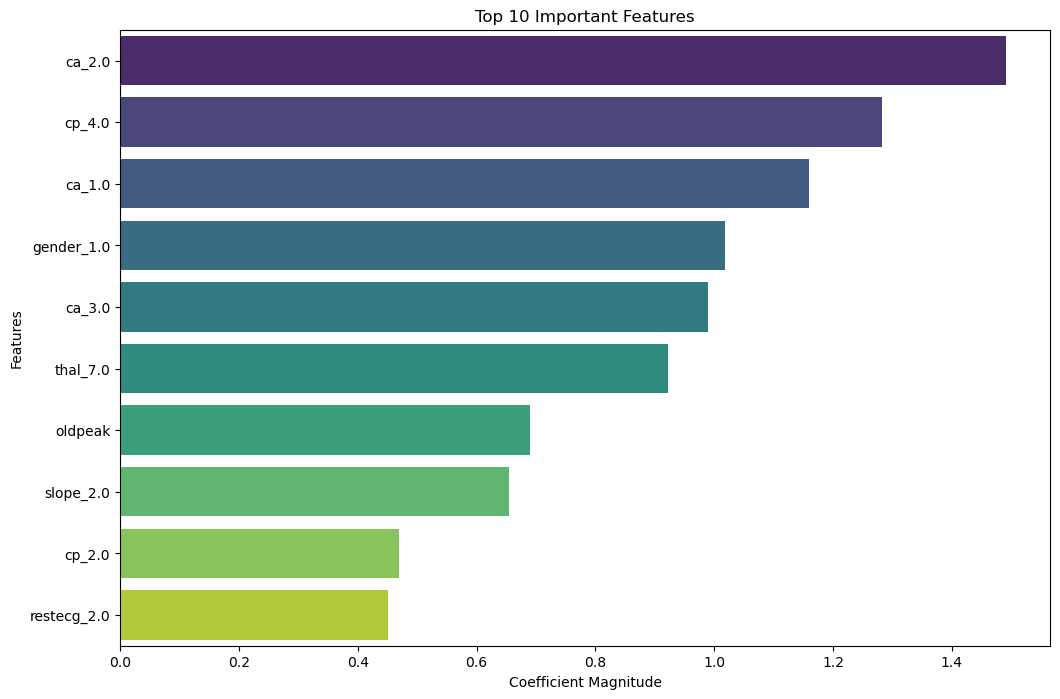

In [24]:
# Plot top 10 important features
plt.figure(figsize=(12,8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance.head(10),
    palette='viridis'
)
plt.title('Top 10 Important Features')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.show()
